### Functionalities to support visualization

In [1]:
property_mapping = {'AtomicWeight':'A', 'Number':'Z', 'Row':'R', 'Column':'C', \
                    'Group':'G', 'CovalentRadius':'R$_{cov}$', 'Electronegativity':'$\chi$',\
                    'GSbandgap': '$E_{g}^{gas}$', 'gap': '$E_{g}$', 'GSmagmom': '$\mu_{0}$',\
                    'MeltingT': '$T_{m}$', 'MendeleevNumber': '$Z_{m}$', 'NUnfilled': '$N_{u}$', \
                    'NValence': '$N_{v}$', 'NdUnfilled': '$N_{u}^{d}$', 'NdValence': '$N_{v}^{d}$',\
                    'NsUnfilled': '$N_{u}^{s}$', 'NsValence': '$N_{v}^{s}$', 'NfUnfilled': '$N_{u}^{f}$',\
                    'NfValence': '$N_{v}^{f}$', 'NpValence': '$N_{v}^{p}$', 'NpUnfilled': '$N_{u}^{p}$',\
                    'character': 'c', 'energy': 'E', 'element':'Z', 'LUMO':'$E^{lumo}$(', 'HOMO':'$E^{homo}$(',
                    'bandcenter': '$E_{band}^{c}$'}

def verbose2symbol(verbose):
    verbose = verbose.replace(' ','')
    outcome = verbose.split(':')
    if len(outcome) == 2:
        #return getsymbol(outcome[0]) + ':' + getsymbol(outcome[1])
        a = getsymbol(outcome[0])
        b = getsymbol(outcome[1])
        a = a.replace('$','')
        b = b.replace('$','')
        return r'$\frac{{{}}}{{{}}}$'.format(a,b)
    else:
        return getsymbol(outcome[0])
    
def getsymbol(verbose):
    outcome = ''
    verbose = verbose.replace(' ','')
    if 'max_' in verbose:
        outcome += f'$\max$('
        verbose = verbose.replace('max_','')
    elif 'min_' in verbose:
        outcome +=  f'$\min$('
        verbose = verbose.replace('min_','')
    elif 'mu_' in verbose:
        outcome +=  f'$\mu$('
        verbose = verbose.replace('mu_','')
    elif 'std_' in verbose:
        outcome +=  f'$\sigma$('
        verbose = verbose.replace('std_','')
    elif 'sum_' in verbose:
        outcome +=  f'$\sum$('
        verbose = verbose.replace('sum_','')
    elif 'range_' in verbose:
        outcome +=  f'$range$('
        verbose = verbose.replace('range_','')

    verbose = verbose.replace('magpie_','')
    verbose = verbose.replace('_','')

    for key, value in property_mapping.items():
        if key in verbose:
            verbose = verbose.replace(key, value)

    verbose.replace('_','')
    verbose = verbose.replace('MendeleevZ', 'Z$_{m}$')
    verbose = verbose.replace('avgfvalenceelectrons', f'$\mu$('+ '$N_{v}^{f}$')
    verbose = verbose.replace('fracfvalenceelectrons', f'$f$('+ '$N_{v}^{f}$')
    verbose = verbose.replace('fracpvalenceelectrons', f'$f$('+ '$N_{v}^{f}$')
    verbose = verbose.replace('avgpvalenceelectrons', f'$\mu$('+ '$N_{v}^{p}$')    

    outcome += verbose
    if 'band' in outcome:
        return outcome
    elif 'sortedelectronegativitydifference' in outcome:
        return 'OEDW'
    else:
        return outcome+')'
    

## Direct-gap stable p-block binary semiconductors

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import ScalarMappable

# ignore printing certain non-relevant warnings to keep the notebook clean
warnings.filterwarnings("ignore", ".*An input array is constant; the correlation coefficient is not defined.*")
warnings.filterwarnings("ignore", ".*The objective has been evaluated at this point before.*")

from darwin.interpretability.interpret import Interpretability

control_comps, treatment_comps = pd.read_pickle('interpretability_pblock_direct_bandgap.pkl')
interp = Interpretability(control_comps, treatment_comps)

# conventional analysis
interp.analysis('statistical')
interp.significance_analysis()
outcome = pd.DataFrame(interp.rules).T
outcome['abs_importances'] = np.abs(outcome['importance'])

/opt/miniconda3/envs/darwin/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'nn.glob.Set2Set' is deprecated, use 'nn.aggr.Set2Set' instead
  warnings.warn(out)


MultipleFeaturizer:   0%|          | 0/100 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
interp = Interpretability(control_comps, treatment_comps)

# conventional analysis
interp.analysis('statistical')
interp.significance_analysis()
outcome = pd.DataFrame(interp.rules).T
outcome['abs_importances'] = np.abs(outcome['importance'])

MultipleFeaturizer:   0%|          | 0/100 [00:00<?, ?it/s]

MultipleFeaturizer:   0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/ht/xqpfqc6n5b775dqzl2nzgww00000gn/T/ipykernel_93696/3025626244.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


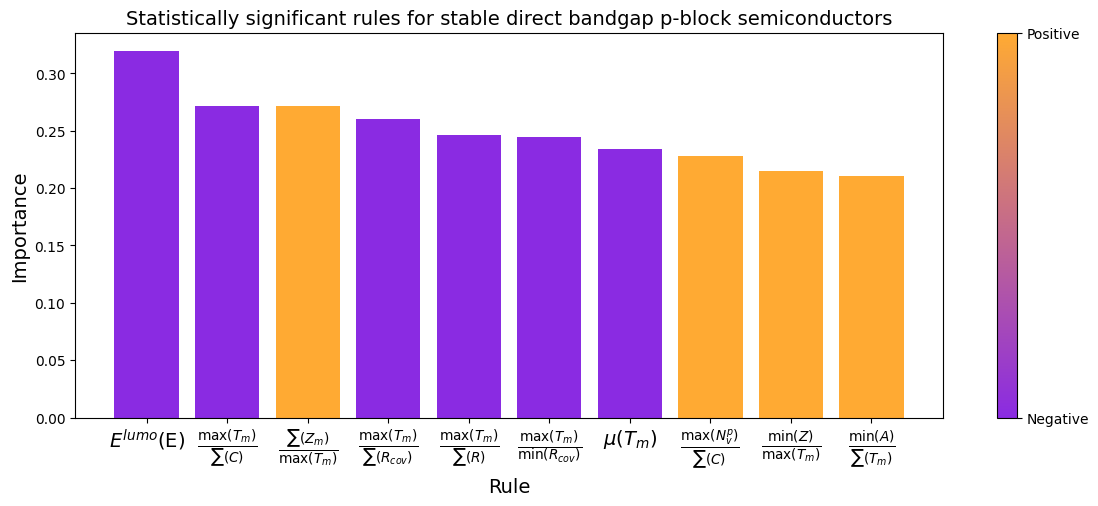

In [5]:
# conventional analysis
statistically_significant = outcome[outcome.pvalue < 0.05].sort_values(by=['abs_importances'], ascending=False)

fig, ax = plt.subplots(figsize=(14,5))
indices = [0,1,2,16,49,55,81,109,144,146] 
axis_grid = np.arange(len(indices))
colors = ['#8A2BE2' if x < 0 else '#FFAA33' for x in statistically_significant.importance.values[indices]]
tmp = ax.bar(axis_grid, statistically_significant.abs_importances.values[indices], color=colors)
labels = [verbose2symbol(x) for x in statistically_significant.index.values[indices]]
tmp = ax.set_xticks(axis_grid, labels, fontsize=14)
ax.set_ylabel('Importance', fontdict={'fontsize': 14})
ax.set_xlabel('Rule', fontdict={'fontsize': 14})
ax.set_title('Statistically significant rules for stable direct bandgap p-block semiconductors', fontdict={'fontsize': 14})

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#8A2BE2","#FFAA33"])
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(-1,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_ticks([-1,1])
cbar.set_ticklabels(['Negative','Positive'])

plt.show()

In [6]:
# ML based analysis
interp.analysis('randomforest')
interp.significance_analysis()
outcome = pd.DataFrame(interp.rules).T
outcome['abs_importances'] = np.abs(outcome['importance'])

Current CV accuracy ( 60 %)is less than 70%. Please be careful about its usage.
Maybe try other interpretability methods for the population under consideration


/var/folders/ht/xqpfqc6n5b775dqzl2nzgww00000gn/T/ipykernel_92777/2173116455.py:16: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


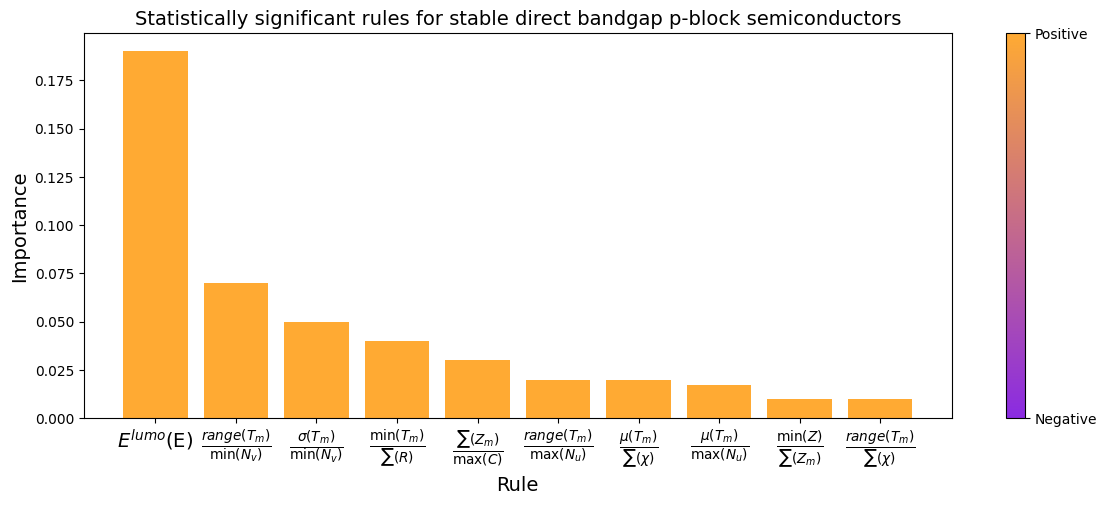

In [ ]:
fig, ax = plt.subplots(figsize=(14,5))
indices = list(np.arange(0,10))
axis_grid = np.arange(len(indices))
colors = ['#8A2BE2' if x < 0 else '#FFAA33' for x in statistically_significant.importance.values[indices]]
tmp = ax.bar(axis_grid, statistically_significant.abs_importances.values[indices], color=colors)
labels = [verbose2symbol(x) for x in statistically_significant.index.values[indices]]
tmp = ax.set_xticks(axis_grid, labels, fontsize=14)
ax.set_ylabel('Importance', fontdict={'fontsize': 14})
ax.set_xlabel('Rule', fontdict={'fontsize': 14})
ax.set_title('Statistically significant rules for stable direct bandgap p-block semiconductors', fontdict={'fontsize': 14})

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#8A2BE2","#FFAA33"])
sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(-1,1))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_ticks([-1,1])
cbar.set_ticklabels(['Negative','Positive'])

plt.show()